X.shape=(2, 400), Y.shape=(1, 400), m=400


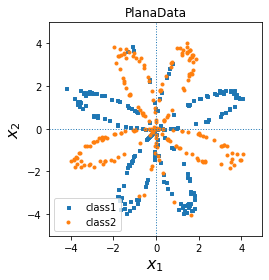

In [4]:
import joy
X, Y = joy.planar_data()
m = X.shape[1]
print('X.shape={}, Y.shape={}, m={}'.format(X.shape, Y.shape, m))
joy.plot_xyw(X.T, Y.squeeze(), title="PlanaData")

Text(0.5, 1.0, 'Hidden neurons=3, accuracy=72.99')

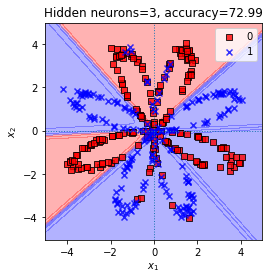

In [8]:
import numpy as np
import matplotlib.pyplot as plt
n_h = 3
net_arch=[2, n_h, 1]
nn = joy.NeuralNetwork(net_arch, eta=0.1, epochs=100)
nn.fit(X, Y)

joy.plot_decision_regions(X.T, Y, nn)
yhat = nn.predict(X.T)
accuracy = float(np.dot(Y, yhat.T) + np.dot(1-Y, 1-yhat.T))/Y.size * 100
plt.title("Hidden neurons={}, accuracy={}".format(n_h, np.round(accuracy,2)))

[0] processing 2 neurons case....
[1] processing 3 neurons case....
[2] processing 4 neurons case....
[3] processing 8 neurons case....
[4] processing 16 neurons case....
[5] processing 32 neurons case....
[6] processing 64 neurons case....
[7] processing 128 neurons case....


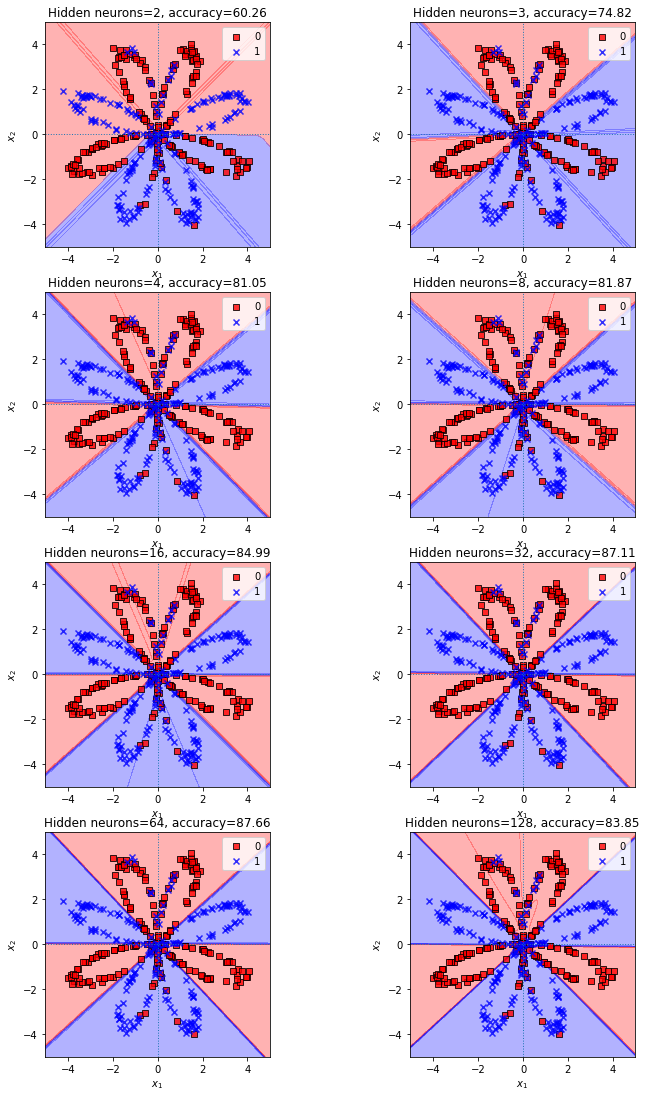

In [10]:
X, Y = joy.planar_data()
plt.figure(figsize=(12,24))
accuracy = []
number_of_neurons = [2,3,4,8,16,32,64,128]
for i, n_h in enumerate(number_of_neurons):
    print("[{}] processing {} neurons case....".format(i, n_h))
    net_arch = [2,1]
    net_arch.insert(1, n_h)
    nn = joy.NeuralNetwork(net_arch, eta=0.1, epochs=200)
    nn.fit(X, Y)
    
    plt.subplot(5,2,i+1)
    joy.plot_decision_regions(X.T, Y, nn)
    yhat = nn.predict(X.T)
    accuracy.append(float(np.dot(Y, yhat.T) + 
                          np.dot(1 - Y, 1 - yhat.T))/Y.size * 100)
    plt.title('Hidden neurons={}, accuracy={}'.format(n_h, np.round(accuracy[i],2)))